# Lab 4
## ArcGIS API for Python and Plotly Express

Where last lab had you working with [Geopandas](https://geopandas.org/) and [Folium](https://python-visualization.github.io/folium/), this lab is going to introduce you to the [ArcGIS API for Python](https://developers.arcgis.com/python/) in the first half and then a bit of work in [Plotly Express](https://plotly.com/python/plotly-express/) in the second.

This is part of building our toolkits in order to automate the acquisition, manipulation, and visualization of spatial data from heteregeneous sources. In particular, right now, we're both learning these individual libraries _but more importantly_ we're practicing the ability to learn and mobilize a library in and of itself. In other words, most scripting will require using multiple libraries to accomplish a task, you are simultaneously familiarizing yourself with these libraries **and** the ability to leverage new libraries.

As always, this lab scales the difficulty up a bit. You have two weeks here, take advantage of them - use the suggested texts, check the emails I've sent each week, come to office hours (or email me to set up a time). You can do this.

This lab has **four**(4) questions, make sure you complete all of them. There are also **two**(2) bonus questions. I strongly encourage you to try each as they'll force you to dive into the libraries we're using!

### Note: If you are struggling installing libraries and setting up environments, check lab 2 (and the recorded lectures for that week) and see Chapters 6, 7, and 9 from your textbook!

## ArcGIS API for Python

From this point onwards in the lab, you need to be in an environment with the arcgis library installed. If you are working from the default ESRI environment, the API comes installed (as do other ESRI libraries and dependencies). If you are setting up a new environment for each lab (which I recommend), you can learn how to install in in **Chapter 9** of your textbook. The command from within your anaconda prompt is:
`conda install -c esri arcgis`
This tells anaconda to use esri's own channel to install the arcgis api library and all its dependencies.

You can (and *should*) read more about the API [here](https://developers.arcgis.com/python/). 

Let's begin, run the following cell:

In [1]:
import arcgis

myGIS = arcgis.GIS()
myGIS.map()

MapView(layout=Layout(height='400px', width='100%'))

You should get an interactive world map. Scroll around it a bit if you want. Bear in mind, this is **not** a map that you can easily embed into a web document, it has to be called using the python API (it is in fact... an object), but still pretty cool.

Now, these next steps might throw up an error, because ESRI. Just run them again if they do.

In [2]:
#Technically, I don't need to keep importing the library, 
#but this is in case the cells end up being run out of order.
import arcgis

ttown = arcgis.geocode('Tacoma')
print(ttown)

[{'address': 'Tacoma, Washington', 'location': {'x': -122.44163999999995, 'y': 47.255130000000065}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'T', 'Score': 100, 'Match_addr': 'Tacoma, Washington', 'LongLabel': 'Tacoma, WA, USA', 'ShortLabel': 'Tacoma', 'Addr_type': 'Locality', 'Type': 'City', 'PlaceName': 'Tacoma', 'Place_addr': 'Tacoma, Washington', 'Phone': '', 'URL': '', 'Rank': 5.5, 'AddBldg': '', 'AddNum': '', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': '', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': '', 'Block': '', 'Sector': '', 'Nbrhd': '', 'District': '', 'City': 'Tacoma', 'MetroArea': 'Seattle Metro Area', 'Subregion': 'Pierce County', 'Region': 'Washington', 'RegionAbbr': 'WA', 'Territory': '', 'Zone': '', 'Postal': '', 'PostalExt': '', 'Country': 'USA', 'LangCode': 'ENG', 'Distance': 0, 'X': 

**Whoah, that's a lot of information**. 

Notice the data formats there. The top level is a list, then there are sub-items that are dictionaries, lists, etc. A list is ordered, so that means I can call the part I want like this:

In [3]:
import arcgis

ttown = arcgis.geocode('Tacoma')[0]

print(ttown)

{'address': 'Tacoma, Washington', 'location': {'x': -122.44163999999995, 'y': 47.255130000000065}, 'score': 100, 'attributes': {'Loc_name': 'World', 'Status': 'T', 'Score': 100, 'Match_addr': 'Tacoma, Washington', 'LongLabel': 'Tacoma, WA, USA', 'ShortLabel': 'Tacoma', 'Addr_type': 'Locality', 'Type': 'City', 'PlaceName': 'Tacoma', 'Place_addr': 'Tacoma, Washington', 'Phone': '', 'URL': '', 'Rank': 5.5, 'AddBldg': '', 'AddNum': '', 'AddNumFrom': '', 'AddNumTo': '', 'AddRange': '', 'Side': '', 'StPreDir': '', 'StPreType': '', 'StName': '', 'StType': '', 'StDir': '', 'BldgType': '', 'BldgName': '', 'LevelType': '', 'LevelName': '', 'UnitType': '', 'UnitName': '', 'SubAddr': '', 'StAddr': '', 'Block': '', 'Sector': '', 'Nbrhd': '', 'District': '', 'City': 'Tacoma', 'MetroArea': 'Seattle Metro Area', 'Subregion': 'Pierce County', 'Region': 'Washington', 'RegionAbbr': 'WA', 'Territory': '', 'Zone': '', 'Postal': '', 'PostalExt': '', 'Country': 'USA', 'LangCode': 'ENG', 'Distance': 0, 'X': -

See that last entry? 'extent' - we're going to use that to set the extent of the map we create to our favorite dusty old jewel (again, sometimes you'll get a 'nonetype' error here, try running it again and if that *still* doesn't work, we'll troubleshoot).

In [3]:
import arcgis

ttown = arcgis.geocode('Tacoma')[0]

tgis = arcgis.GIS()

tmap = tgis.map()
tmap.extent = ttown['extent']

tmap

MapView(layout=Layout(height='400px', width='100%'))

### Nice!

That was a bit of a contrived example showing how you can chain parts of the API together; but, you could also get the same result like this:

In [4]:
import arcgis

tgis = arcgis.GIS()

tmap = tgis.map("Tacoma, WA")

tmap

MapView(layout=Layout(height='400px', width='100%'))

**Pay attention to what's different there**. In point of fact, `.map()` let's us pass where we want the map centered (the extent) as text that it will attempt to geocode for us *without* us having to explicitly handle that. 

**But**, that won't always work correctly *and*, more importantly, that won't always be how we want to pass in extent information (we may end up with coordinates from a social media post, etc.), so it's useful to know what's happening in the background.

# These next steps are crucial, please make sure you understand what's happening.

I will be talking through this in class. If you come back to this part of the lab and are confused, go to the video!

*Some* tasks can be performed 'for free' with the ArcGIS API. But, as we know, ESRI doesn't like to give everything away for free and the API allows us to interface with and control an ArcGIS Online environment. In this case, we'll be working with the one associated with the University of Washington Tacoma.

Here is where things get important:

**Tasks use credits. You have been given a set number of credits.** That means that you **do not want** to just keep running these scripts over and over again. You also don't want to run them on full data sets until you're *sure they'll work*. 

This is a crucially important aspect of programming in online environments. You have about 10x the number of credits you need for this lab; so, if you run out... *it means something has gone wrong*. No, you won't fail; and, yes, there are more available. **But**, that won't necessarily be true in other settings. Use this moment to learn and practice clever and responsible coding.

In [5]:
import arcgis

print('Test Time!')

#You need to enter your username and password as strings in the command below.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', '', '')

print('Logged in as ' + str(gis.properties.user.username))

#Now, let's see what you have uploaded onto our AGOL!
mysearch = gis.content.search(query='owner: GregoryLund', item_type='Feature Layer')
#Again, you need to substitute your username in the above. For this example, I'm using Greg's.

#DO NOT TURN IN A NOTEBOOK WITH YOUR USERNAME AND PASSWORD
#YOU WILL LOSE POINTS


#The following loops through every layer that belongs to the username 
#and displays a summary of it.
for item in mysearch:
    display(item)
    


Test Time!
Logged in as fishel2_UWT_GT


<Item title:"GIS 312 Day 1 Survey Beta_fieldworker" type:Feature Layer Collection owner:GregoryLund>

<Item title:"Damage Assessment_stakeholder" type:Feature Layer Collection owner:GregoryLund>

<Item title:"Freshman Preview Day_stakeholder" type:Feature Layer Collection owner:GregoryLund>

<Item title:"Gregs first survey from Port Townsend Storymap_fieldworker" type:Feature Layer Collection owner:GregoryLund>

<Item title:"GIS 311 Kuiz 5 Survey  - Beta 2" type:Feature Layer Collection owner:GregoryLund>

<Item title:"Water Service Request Layer" type:Feature Layer Collection owner:GregoryLund>

<Item title:"GIS 311 Kuiz 5 Survey" type:Feature Layer Collection owner:GregoryLund>

<Item title:"Freshman Preview Day_fieldworker" type:Feature Layer Collection owner:GregoryLund>

<Item title:"Seed Survey" type:Feature Layer Collection owner:GregoryLund>

<Item title:"Involvement Fair Survey_fieldworker" type:Feature Layer Collection owner:GregoryLund>

Depending on what you've uploaded to our AGOL, you'll see different features listed above. You can add them to your map. 


Let's go over how we can add *existing resources* to a map and then manipulate them using the API. First, I'm going to search for layers that involve the term "Tacoma," then I'll create a map of the Tacoma area and add that file to it.

First, our search...

<Item title:"SeattleWAElectionBallotDropBoxes" type:Feature Layer Collection owner:MSGT_16_reuben>

<Item title:"Tacoma_Fire_Test_VGI" type:Feature Layer Collection owner:bricker0>
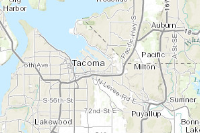

<Item title:"TacomaFinalRepot" type:Feature Layer Collection owner:gjbcuw>
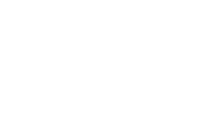

<Item title:"Prototype3a" type:Feature Layer Collection owner:gjbcuw>
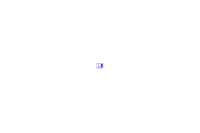

<Item title:"Santamaria_Lab2B" type:Feature Layer Collection owner:santam16>
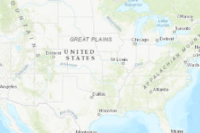

<Item title:"Prototype3b" type:Feature Layer Collection owner:gjbcuw>
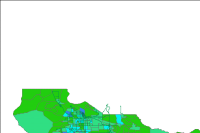

<Item title:"VacantUnits" type:Feature Layer Collection owner:gjbcuw>
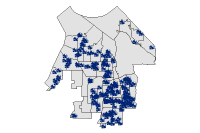

<Item title:"UW Tacoma Affective Campus Map v2_stakeholder" type:Feature Layer Collection owner:geotek_MSGT>

<Item title:"Tacoma Database View" type:Feature Layer Collection owner:vesmae>

<Item title:"jakeroot_Lab_4_app_v2" type:Feature Layer Collection owner:jakeroot_UWT_GT>
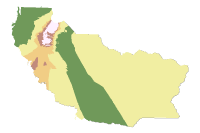

In [6]:
import arcgis

#We're going to set our GIS as our online account
#This means we WILL be using credits, so be careful!

tgis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', '', '')

#Now I'm going to search for the layer I want and then add it to the map.

tacomalayers = tgis.content.search('Tacoma', 'feature_service', max_items=10)
#Now, I'll use a for loop to look at the available layers
#Note: You may see different layers here. I am an admin.
for item in tacomalayers:
    display(item)

**Note:** You will get different results than I did, I'm an admin, you aren't.

Also, note, the results come as an ordered list. So, I can call them in various ways. Here, I'm going to call the fourth entry of that list and add it to my map.

In [7]:
#Let's create our map and center it around Tacoma
tmap = tgis.map("Tacoma, WA")

#Now, let's add something from the ordered list we created in the previous cell
#You can add a different number, this is just to demonstrate how the data is returned from a search and how you add it to a map
tmap.add_layer(tacomalayers[2])

#and now let's look at it
tmap

MapView(layout=Layout(height='400px', width='100%'))

Try clicking around. Try loading more than one layer, etc. 

Notice how you could, for example, add a whole host of layers using iteration. 

Now, it's time to jump into some data manipulation. We'll be taking a csv (comma separated value - a common form of flat-file data), manipulating it into something that can be displayed spatially, and then adding it to a map. We'll then also do some basic geoprocessing on it.

That sounds like a lot, but you have all the tools to do this. Use pseudocode, break problems apart. Work together! Be creative - break things!

In the files repository (where you found this notebook and not where you will upload it once completed), you'll find two .csv files that I grabbed from the [Results253](https://data.cityoftacoma.org/) website: Museums_in_Tacoma.csv and Tacoma_Parks.csv.

We're going to use a library called [pandas](https://pandas.pydata.org/) to process this data and then add it to our map. You've worked with some pandas commands already when you were exploring GeoPandas. GeoPandas adds _spatial features_ to Pandas dataframes. Well, today we're going to be using ArcGIS to do the same!

I'll be doing the early steps, but you'll be asked to write the final scripts yourself. 

**Please note, I assume you have downloaded the csvs to the local directory where you also have this lab. You can review previous labs on how to handle file locations**

Also note, pandas gets installed in any environment with GeoPandas and ArcGIS (they both rely on it!). So, if you get an error, just manually install it as needed.

Let's look at our CSVs.


In [10]:
import pandas

parks = pandas.read_csv('Tacoma_Parks.csv')
parks.head()

Park Name  \
0              Manitou Park   
1             McKinley Park   
2             Oak Tree Park   
3  Puget Creek Natural Area   
4                Ruston Way   

                                    Park Description  \
0  Established in 1915, what was once a tourist c...   
1  Pathways among the trees and new playground eq...   
2  Oak Tree Park is a 25 acre parcel that compris...   
3  At 66-acres, this natural area has one of only...   
4  This two-mile long scenic waterfront with pano...   

                                      Park Location  
0                4408 S. Manitou Park\r\nTacoma, WA  
1                  907 Upper Park St.\r\nTacoma, WA  
2                S 74th and Cedar St.\r\nTacoma, WA  
3  N. Alder Way &amp; N. Lawrence St.\r\nTacoma, WA  
4                          Ruston Way\r\nTacoma, WA

In [11]:
museums = pandas.read_csv('Museums_in_Tacoma.csv')
museums.head()

Name           Address City, State and ZIP Code  \
0      Children's Museum of Tacoma  1501 Pacific Ave         Tacoma, WA 98402   
1                  Museum of Glass      1801 Dock St         Tacoma, WA 98402   
2  Washington State History Museum  1911 Pacific Ave         Tacoma, WA 98402   
3            Foss Waterway Seaport       705 Dock St         Tacoma, WA 98402   
4                Tacoma Art Museum  1701 Pacific Ave         Tacoma, WA 98402   

                                            Location  \
0  1501 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...   
1  1801 Dock St\r\nTacoma, WA 98402\r\n(47.245401...   
2  1911 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...   
3  705 Dock St\r\nTacoma, WA 98402\r\n(47.257877,...   
4  1701 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...   

                                             Website  
0               Website (http://www.playtacoma.org/)  
1           Website (http://museumofglass.org/visit)  
2  Website (http://www.washingtonhistory.org/visi...  
3      Website (http://www.fosswaterwayseaport.org/)  
4          Website (http://www.tacomaartmuseum.org/)

What you should see is a nicely formatted table of the first five entries (the 'head') of each data set. Pandas is extremely powerful and has done some of the formatting for us.

Take a look at that the columns, does one seem to have location information in it? Wouldn't it be useful to be able to geocode said information and add it to a map?

I'm going to show you how to do this for the museums dataset and then leave you to figure out how to do so for the parks one (there's a trick to the parks file... what do you think happens when there's a space in a column name?)


In [12]:
import pandas, arcgis


#Setting up our base map.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', 'USERNAME', 'PASSWORD')
tmap = gis.map("Tacoma, WA")


#We can import pandas data fields into the ArcGIS library so long as we set an 'address' field.
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})
tmap.add_layer(museumsgis)

tmap

MapView(layout=Layout(height='400px', width='100%'))

### Problem 1: Display both layers on a single map.

+1 bonus points if you display them in different colors.

In [16]:
import arcgis, pandas

#Need to set up our gis...
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', '', '')
tmap = gis.map("Tacoma, WA")

#Need to load both layers into our map...
parks = pandas.read_csv('Tacoma_Parks.csv')
museums = pandas.read_csv('Museums_in_Tacoma.csv')

parksgis = gis.content.import_data(parks, {'Address' : 'Park_Location'})
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})

tmap.add_layer(parksgis)
tmap.add_layer(museumsgis)

#Need to display our map...

tmap

Exception: A general error occurred: Invalid username or password.

### Good work!

Ok, now let's do some spatial analysis. You'll want to read up on the arcgis.features module, you can find that information [here](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html). You can also consult **Chapter 9** of your book.

There are a lot of ways to do this and the way we're going to do it is just one. We'll be using the arcgis.features.analysis.find_nearest() tool.

In [4]:
import arcgis, pandas

#Setting up our base map.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', '', '')
tmap = gis.map("Tacoma, WA")

#Loading up our CSVs
# You need to do this. :)
parks = pandas.read_csv('Tacoma_Parks.csv')
museums = pandas.read_csv('Museums_in_Tacoma.csv')

#Like above, let's load them into our map...
# You need to do this. :)

parksgis = gis.content.import_data(parks, {'Address' : 'Park_Location'})
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})
linegis = gis.content.import_data('nearestlines.shp')

tmap.add_layer(parksgis)
tmap.add_layer(museumsgis)
tmap.add_layer(linegis)

tmap
#Now, we're going to use the find_nearest sub-module of the arcgis.features.analysis module!
#THIS USES CREDITS! ONCE YOU'VE GENERATED IT ONCE, STORE IT IN MEMORY (OR EXPORT IT AND SAVE IT SOMEWHERE!)
#YOU DO NOT NEED TO RE-CREATE THIS RESULT EVERY TIME YOU OPEN THIS LAB!
#BE RESPONSIBLE!

#nearestPark = arcgis.features.analysis.find_nearest(museumsgis, parksgis, max_count=1)

#nearestLines = nearestPark['connecting_lines_layer'].query().sdf

#nearestLines.spatial.to_featureclass('nearestlines.shp')

RuntimeError: Cannot infer layer: will not be added to map

In [7]:
#reads output of the above block's analysis and storage

linegis = gis.content.import_data('nearestlines.shp')



   OID  From_ID  To_ID  NearRank                        From_Name  \
0    1        1     38         1      Children's Museum of Tacoma   
1    2        2     12         1                  Museum of Glass   
2    3        3     12         1  Washington State History Museum   
3    4        4     42         1            Foss Waterway Seaport   
4    5        5     38         1                Tacoma Art Museum   

       From_Address From_City__State_and_ZIP_Code  \
0  1501 Pacific Ave              Tacoma, WA 98402   
1      1801 Dock St              Tacoma, WA 98402   
2  1911 Pacific Ave              Tacoma, WA 98402   
3       705 Dock St              Tacoma, WA 98402   
4  1701 Pacific Ave              Tacoma, WA 98402   

                                       From_Location  \
0  1501 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...   
1  1801 Dock St\r\nTacoma, WA 98402\r\n(47.245401...   
2  1911 Pacific Ave\r\nTacoma, WA 98402\r\n(47.24...   
3  705 Dock St\r\nTacoma, WA 98402\r\n(47.

Hmmm, what's going on there? It looks like the find_nearest() command returns a dictionary of two feature classes.

(Note: I used max_count=1 to set it so that for each result, only the absolutely shortest pair was returned).

Let's add our museums, our parks, and the lines that connect the shortest pairs together.

### Problem 2: Museum and park pairs.

Display a map that has each museum connected by a line to the park to which it is closest.

Use driving distance for nearest, which is not necessarily linear distance (this is a parameter you can pass to the find_nearest() function). You can read more about it [here](https://developers.arcgis.com/python/api-reference/arcgis.features.analysis.html?highlight=nearest#arcgis.features.analysis.find_nearest)

In [25]:
import arcgis, pandas, csv

#Setting up our base map.
gis = arcgis.GIS('https://uwt-gis-geotech.maps.arcgis.com', '', '')
tmap = gis.map("Tacoma, WA")

#Loading up our CSVs
# You need to do this. :)
parks = pandas.read_csv('Tacoma_Parks.csv')
museums = pandas.read_csv('Museums_in_Tacoma.csv')
nearestdrive = pandas.read_json('nearestdrive.json')

#Like above, let's load them into our map...
# You need to do this. :)

parksgis = gis.content.import_data(parks, {'Address' : 'Park_Location'})
museumsgis = gis.content.import_data(museums, {'Address' : 'Location'})

tmap.add_layer(parksgis)
tmap.add_layer(museumsgis)
tmap.add_layer(drivegis)

tmap

#drivenPark = arcgis.features.analysis.find_nearest(museumsgis, parksgis, max_count=1, measurement_type = 'Driving Distance')


Exception: Cannot create bbox. Expected a valid shape with at least one point. Got a shape of type '3' and 0 points.

In [17]:
#Save

#streetlines = nearestpark['connecting_lines_layer'].query().sdf

#streetlines.to_json('nearestdrive.json')

There's an awful lot you can do with the ArcGIS API, especially when you combine it with the other tools you've already started to engage. **Remember**, different libraries will handle things differently, play to their strengths. If something is very difficult (or costly) in ArcGIS, could you possibly do it in GeoPandas? If something is slow in GeoPandas, might it be easier with the ArcGIS API?

The more adaptable you are, the better you'll be able to answer complicated questions. 

I'm going to give you a case in point below and then ask you a **bonus question**.

Now that I know what parks are closest to each museum, I wonder **which museum is furthest from all parks**? There are a lot of ways to answer this, I'm going to take a slightly convoluted path to show you how easy it is to move spatial data between libraries.

First, I notice that the `nearestpark['connecting_lines_layer']` has a distance field (if you dig into it, you can find out it's called `Total_Miles` for me. Awesome! Now all I need to do is a **query** looking to find what entry has that highest there!

Unfortunately, I know (or discover by reading error messages) that with `Feature Collections` `where` queries [aren't supported](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurecollection). The same documentation tells me that a `.query()` **will** return a `Feature Set` and the [documentation on that](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset) tells me that I can convert a `Feature Set` to a spatial pandas dataframe!

**I know this isn't interesting, but being able to *read documentation* to chain tools together is the single most important skill you can learn right now!

In [41]:
#This shows how I've now returned my Feature Collection as a Feature Set
print(type(nearestpark['connecting_lines_layer'].query()))

#This converts that Feature Set to a spatial data frame (the .sdf method)
#Then I print out the first few entries using .head()
print(nearestpark['connecting_lines_layer'].query().sdf.head())


<class 'arcgis.features.feature.FeatureSet'>
   OID  From_ID  To_ID  NearRank                        From_Name  \
0    1        1     38         1      Children's Museum of Tacoma   
1    2        2     12         1                  Museum of Glass   
2    3        3     12         1  Washington State History Museum   
3    4        4     42         1            Foss Waterway Seaport   
4    5        5     38         1                Tacoma Art Museum   

       From_Address From_City__State_and_ZIP_Code  \
0  1501 Pacific Ave              Tacoma, WA 98402   
1      1801 Dock St              Tacoma, WA 98402   
2  1911 Pacific Ave              Tacoma, WA 98402   
3       705 Dock St              Tacoma, WA 98402   
4  1701 Pacific Ave              Tacoma, WA 98402   

                                       From_Location  \
0  1501 Pacific Ave\nTacoma, WA 98402\n(47.249063...   
1  1801 Dock St\nTacoma, WA 98402\n(47.245401, -1...   
2  1911 Pacific Ave\nTacoma, WA 98402\n(47.244424... 

What I want is the **maximum** value found in that `Total_Miles` field... How might I find that?

Well, a good place to start might be [how to find a maximum or minimum value in a pandas dataframe](https://www.datasciencemadesimple.com/get-maximum-value-column-python-pandas/).

But now, how do I **programatically** make it so that that entry is the one returned? In other words, I now know what the maximum distance is, how do I query out that result without just typing the answer?

This is a question about **abstraction**. It's the ultimate goal of this course - how can I build a system that won't just handle *this* data set, but will handle **any** data set I throw at it? How can I build a spatial analysis and visualization script that isn't bespoke for each file I have, but instead can handle hundreds or thousands of files at a time??

### Bonus Problem 1: Furthest school (3pts)

You'll also find a CSV called "Tacoma_Schools.csv."

What school is the **furthest** from **any** Museum? In other words, what school has the *furthest closest museum*?

You get 1pt for finding the answer, you get 2 pts for displaying **only** that school its matched pair (programmatically - don't just find the answer then use OID or something to specify the result, we're moving away from bespoke mapping and towards automated analysis).

This is a *hard* question to answer fully programmatically; but, it's well worth trying. Spent some time on it if you can!


# Check in point. (2pts)
## Have these questions answered by the start of our second week with this lab (or, at the least, have made a serious attempt to do so!)


### Plotly.Express

The next section of the lab is going to introduce and then have us work through Plotly.Express.

[Plotly.Express](https://plotly.com/python/plotly-express/) is "terse, consistent, highl-level API for creating figures." In other words, it's a very handy way to make **interactive** visualizations in python very quickly and with diverse sets of data. It's related to [Dash](https://plotly.com/python/plotly-express/#what-about-dash) in important ways - many of the commands that work in Plotly.Express will similarly work with Dash; so, if you want to make stand alone analytical and visualization applications, **pay attention!**


First, make sure you've installed plotly. Normally, you'd want to check to make sure that the ArcGIS API and Plotly don't have dependencies that conflict (and if necessary, create a new environment to address that). However, I'm so kind I already did that for you. You can just install plotly with `conda install -c plotly plotly` - this uses the plotly channel, just like we used the ESRI channel for ArcGIS.

With that underway, let's make a map.

In [6]:
#I'm going to import the library 'as' something else - this just gives it a short nickname
#Otherwise, I'd be typing plotly.express.command.etc every time
import plotly.express as pe

# Much like GeoPandas, Plotly.Express comes with some data
# It's all pre-processed to work well with the library
# In this case, it's a dataframe of 2013 Montreal mayoral election
# You can read more here: https://plotly.com/python-api-reference/generated/plotly.express.data.html
data = pe.data.election()

data.head()

district  Coderre  Bergeron  Joly  total    winner     result  \
0     101-Bois-de-Liesse     2481      1829  3024   7334      Joly  plurality   
1  102-Cap-Saint-Jacques     2525      1163  2675   6363      Joly  plurality   
2   11-Sault-au-Récollet     3348      2770  2532   8650   Coderre  plurality   
3           111-Mile-End     1734      4782  2514   9030  Bergeron   majority   
4         112-DeLorimier     1770      5933  3044  10747  Bergeron   majority   

   district_id  
0          101  
1          102  
2           11  
3          111  
4          112

This data also comes with a pre-made geojson. We'll load that up, then create a choropleth based on vote totales for the candidate 'Joly'

*I know, you're already saying to yourself "You shouldn't make choropleths with counts, you need reates! And you're right!*


In [1]:
import plotly.express as pe

data = pe.data.election()
geojson = pe.data.election_geojson()

mmap = pe.choropleth_mapbox(data, 
                            geojson=geojson, 
                            color='Joly',
                            color_continuous_scale="Viridis",
                            locations='district',
                            featureidkey="properties.district",
                            center={"lat": 45.5517, "lon": -73.7073},
                            mapbox_style='carto-positron',
                            zoom=9
                           )

mmap.show()

I think that's rather neat and that's just the tip of the iceberg. But, I want to go over a few things.

Take a look [here](https://plotly.com/python/plotly-express/#tile-maps). We're running a slightly modified example. The 'big' change (it's not big) is that I set the map to use the continuous color scale as defined by Viridis (a sub-package that plotly uses, read more about it [here](https://www.geeksforgeeks.org/matplotlib-pyplot-viridis-in-python/) or about the project itself [here](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html)).

It's also important to realize why we have to set the `featureidkey` as not all data sets will require that. You can read more about that [here](https://plotly.com/python/mapbox-county-choropleth/#indexing-by-geojson-properties).

*If all those links seem hard right now, that's **ok**. Learning to read documentation is a process. You can't memorize every library, so you need to be able to parse through these things!*

Let's take another example from the [documentation linked above](https://plotly.com/python/plotly-express/#maps). This time, let's make an animated map that shows differences in per capita gdp by country taken from [gapminder](https://www.gapminder.org/data/). Again, this is pre-formatted example data that comes with plotly.express (formatted as a **pandas dataframe!**), but hopefully it sparks some inspiration in terms of what data you might bring.

In [3]:
import plotly.express as pe

#Load up the gapminder data
data = pe.data.gapminder()

#Let's look at it.
data.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [4]:
#Now let's visualize it...

gmap = pe.scatter_geo(data, 
                      locations='iso_alpha',
                      color='continent',
                      hover_name='country',
                      size='gdpPercap',
                      animation_frame='year',
                      projection='hammer'
                     )

gmap.show()

Again, this is hugely powerful. And you absolutely **should** look through the examples and linked documentation you can find [here](https://plotly.com/python/plotly-express/). Plotly Express isn't just for maps, it can also do a variety of interactive data visualizations.

But, now I'm going to ask you to bring in *other* data and visualize it with Plotly Express. Please note: You can process this data using **any tool** you wish (geopandas, pandas, the arc api, etc.); however, you must visualize it with plotly express.

### Question 3: Tacoma Fires 1

Here, I'm going to provide you a geojson and a csv both (mostly) from [Results253](https://data.cityoftacoma.org/). I have done the *slightest* bit of pre-processing on the geojson as it actually contained a typo that was annoying to fix (feel free to ask me what it was). 

I'm going to ask you two questions related to this data. First, I just want you to throw up a scatterplot of all the fire locations. The **size** of the point should be set to the estimated property lost. When I hover over the point, it should tell me what Neighborhood Council area it falls into.

Feel free to give the map a title, to add other information to the hover, to change the color based on some other property, etc. I'll give **+1pts** if you do at least two additional steps to improve your map (a title and color set to another property; color set to another property and additional hover over information; etc.).


**I'll get you started, but you're going to need to look at examples that you can find [here](https://plotly.com/python/plotly-express/#maps), [here](https://plotly.com/python/scatter-plots-on-maps/#geographical-scatter-plot-with-pxscattergeo), and elsewhere!**


In [27]:
# these are some libraries that we'll use
import pandas
import plotly.express as pe

#Let's load up our csv into a pandas dataframe
data = pandas.read_csv('Fires.csv')


#Let's use a mapbox scatterplot, I'll show you the basic construction
#You'll need to fill in the details!
smap = pe.scatter_mapbox(#stuff goes here!
                         zoom=9, 
                         mapbox_style='carto-positron')

smap.show()




### Question 4 - Tacoma Fires 2


I'm going to ask you to create a choropleth map. It's *fine* if you visualize this based on counts; however, if you normalize to an appropriate rate (population, perhaps?), that will be **+1 pts**.

The csv is a list of all of the fire incidence data from 2011 onwards (12,000+) and the geojson is of the Tacoma Neighborhood Councils. I'm asking you to make a choropleth of the number of fires per council area (and offering you bonus points to make it a meaningful choropleth with some appropriate normalization).

**Your script should output a choropleth map using Plotly Express of the number of Fires by Neighborhood Council area**. You will not be judged for cartographic elements here (color ramp, etc.). The files are available in the git repo and are called "Fires.csv" and "NC.geojson".

**Again, you'll need to look at documentation [here](https://plotly.com/python/plotly-express/#maps), [here](https://plotly.com/python/mapbox-county-choropleth/), and elsewhere!** 

*Hint: I found the trickiest bit to be setting the featureidkey... In this case, it's going to be the **name** of the properties. 

In [24]:
import json, pandas
import plotly.express as pe

#load up the data
data = pandas.read_csv('Fires.csv')

#I could do this all in one line as I load the file, but I wanted to call it out
#This next line creates a sum of how many fires are in each Neighborhood Council
#First, it groups everything by the NeighborhoodCouncil column
#Then it counts the entries
#Then it resets the index (basically recreates the dataframe from the results of the .count)
data2 = data.groupby('NeighborhoodCouncil').count().reset_index()

#Here I'm going to load the geojson up using a json handling library
geojson = json.load(open('NC.geojson', 'r'))


mmap = pe.choropleth_mapbox(
                            #You need to add stuff here!
                           )

mmap.show()



### Bonus Problem: Spatial Joins (+4pts)

In the above problems, I actually reformatted some of the 'raw' data to allow for a non-spatial join (based on the shared information of Neighborhood Council information).

But, as you know, you don't need to do that. You can also join based on spatial relations - this is, in fact, one of the core strengths of GIS.


**Recreate the above choropleth using a spatial join** In other words, use GeoPandas or the ArcGIS API (or something else) to join all of the points in each neighborhood council *by their location*, then produce a choropleth map. Full points if it is appropriately normalized, 3 pts if it is not.

To use GeoPandas, check out [sjoin](https://geopandas.org/reference/geopandas.sjoin.html). If you want to use Arc, you could use [arcpy](https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/spatial-join.htm) (which your textbook is a great reference for), or you can continue to use the API by checking out documentation [here](https://developers.arcgis.com/python/api-reference/arcgis.features.analysis.html#arcgis.features.analysis.join_features).